*Cargamos librerías necesarias*

In [10]:
import numpy  as np
import pandas as pd

import matplotlib.pyplot as plt # para dibujar
%matplotlib inline

from tensorflow.keras.utils import to_categorical # para convertir números en categóricos
from sklearn.preprocessing import LabelEncoder # para codificar variables categóricas

*Cargamos fichero*

In [11]:
data = pd.read_csv("datasets/Data_Science_Jobs_Salaries.csv")
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021e,EN,FT,Data Science Consultant,54000,EUR,64369,DE,50,DE,L
1,2020,SE,FT,Data Scientist,60000,EUR,68428,GR,100,US,L
2,2021e,EX,FT,Head of Data Science,85000,USD,85000,RU,0,RU,M
3,2021e,EX,FT,Head of Data,230000,USD,230000,RU,50,RU,L
4,2021e,EN,FT,Machine Learning Engineer,125000,USD,125000,US,100,US,S


In [12]:
data.shape

(245, 11)

Por la poca cantidad de datos, podemos pensar en sumar más datasets.
En un principio, para predecir salarios con estos datos se puede utilizar Ridge Regression y/o SVR (kernel=lineal) según nos indica el Scikit Learn cheat sheet:

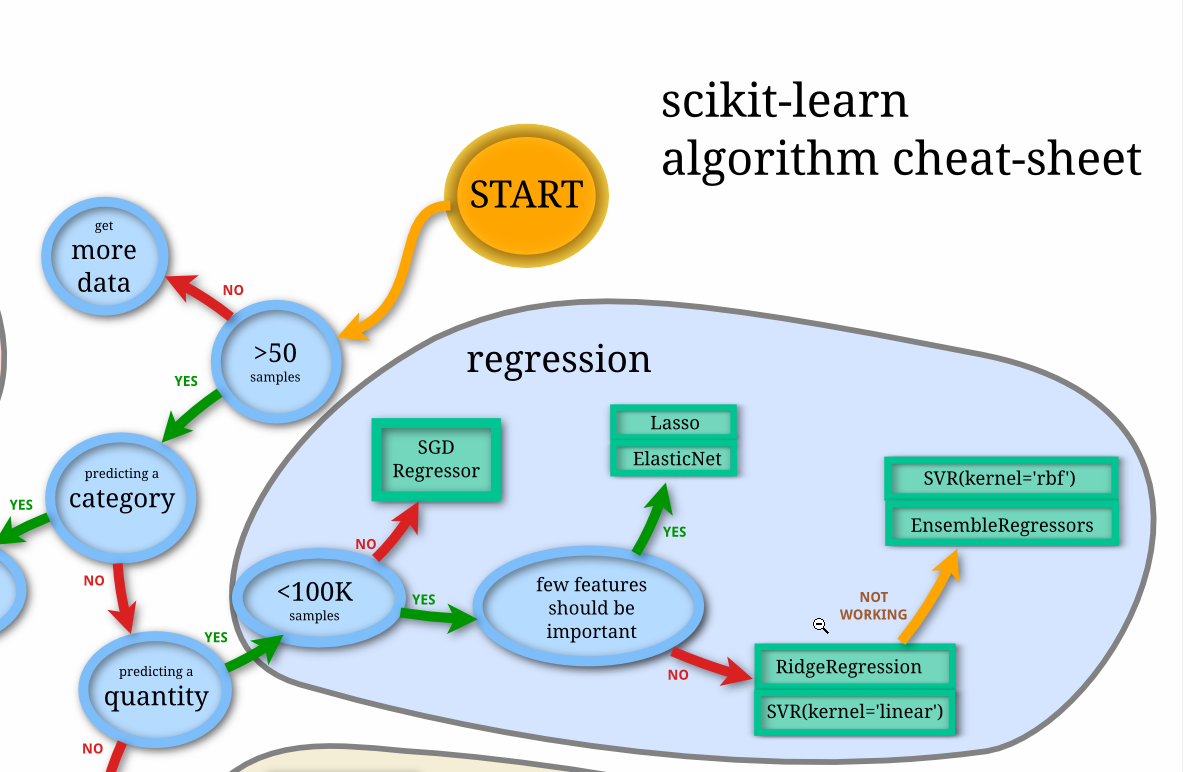

**Segundo dataset**

*Cargamos fichero*

In [13]:
data_2 = pd.read_csv("datasets/ds_salaries.csv")
data_2.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [14]:
data_2.shape

(607, 12)

In [ ]:
data_3 = pd.read_csv("../scrapper/output/output_United-Kingdom.csv", encoding='cp1252')
data_3.head()

In [16]:
data_3.shape

(15, 8)

In [17]:
data.dtypes

work_year             object
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [18]:
data_2.dtypes

Unnamed: 0             int64
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [19]:
data_2.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [20]:
data_2 = data_2.drop(["Unnamed: 0"], axis=1) # Dropeamos esa primera columna que tiene de más

In [21]:
frames = [data, data_2]

result = pd.concat(frames,ignore_index=True,verify_integrity=True) # Concatenamos los dos DS

# data_c=pd.concat([data],[data_2])

In [22]:
result.shape

(852, 11)

In [23]:
data.sort_values(by='salary')

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
218,2021e,EN,FT,Data Scientist,4000,USD,4000,VN,0,VN,M
147,2021e,MI,FT,Data Engineer,4000,USD,4000,IR,100,IR,M
168,2020,MI,FT,Data Analyst,8000,USD,8000,PK,50,PK,L
136,2021e,EN,FT,BI Data Analyst,9272,USD,9272,KE,100,KE,S
32,2020,EN,FT,Data Analyst,10000,USD,10000,NG,100,NG,S
...,...,...,...,...,...,...,...,...,...,...,...
124,2021e,SE,FT,Machine Learning Engineer,4900000,INR,66442,IN,0,IN,L
244,2021e,SE,FT,Data Science Manager,7000000,INR,94917,IN,50,IN,L
58,2021e,MI,FT,BI Data Analyst,11000000,HUF,36732,HU,50,US,L
131,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L


In [24]:
data_2.sort_values(by='salary')

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
238,2021,EN,FT,Data Scientist,4000,USD,4000,VN,0,VN,M
185,2021,MI,FT,Data Engineer,4000,USD,4000,IR,100,IR,M
15,2020,MI,FT,Data Analyst,8000,USD,8000,PK,50,PK,L
124,2021,EN,PT,Data Analyst,8760,EUR,10354,ES,50,ES,M
196,2021,EN,FT,BI Data Analyst,9272,USD,9272,KE,100,KE,S
...,...,...,...,...,...,...,...,...,...,...,...
285,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L
137,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
102,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L


El data_2 tiene los datos del data y otros más, así que me quedo con data_2 y le asigno el nombre "data"

In [25]:
data = data_2

In [26]:
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [27]:
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [28]:
for u in data_2.columns:
  print(u)
  print(data_2[u].unique())

work_year
[2020 2021 2022]
experience_level
['MI' 'SE' 'EN' 'EX']
employment_type
['FT' 'CT' 'PT' 'FL']
job_title
['Data Scientist' 'Machine Learning Scientist' 'Big Data Engineer'
 'Product Data Analyst' 'Machine Learning Engineer' 'Data Analyst'
 'Lead Data Scientist' 'Business Data Analyst' 'Lead Data Engineer'
 'Lead Data Analyst' 'Data Engineer' 'Data Science Consultant'
 'BI Data Analyst' 'Director of Data Science' 'Research Scientist'
 'Machine Learning Manager' 'Data Engineering Manager'
 'Machine Learning Infrastructure Engineer' 'ML Engineer' 'AI Scientist'
 'Computer Vision Engineer' 'Principal Data Scientist'
 'Data Science Manager' 'Head of Data' '3D Computer Vision Researcher'
 'Data Analytics Engineer' 'Applied Data Scientist'
 'Marketing Data Analyst' 'Cloud Data Engineer' 'Financial Data Analyst'
 'Computer Vision Software Engineer' 'Director of Data Engineering'
 'Data Science Engineer' 'Principal Data Engineer'
 'Machine Learning Developer' 'Applied Machine Learning 

Eliminamos las columnas "salary" y "currency" para quedarnos con "salary_in_usd"

In [29]:
data = data.drop(["salary","salary_currency"], axis=1)

In [30]:
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')

In [31]:
data.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [32]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,607.0,2021.405272,0.692133,2020.0,2021.0,2022.0,2022.0,2022.0
salary_in_usd,607.0,112297.869852,70957.259411,2859.0,62726.0,101570.0,150000.0,600000.0
remote_ratio,607.0,70.922570,40.709130,0.0,50.0,100.0,100.0,100.0


Primero pruebo con una sola columna

In [33]:
label_encoder = LabelEncoder()

data["experience_level"] = label_encoder.fit_transform(data["experience_level"])

data["experience_level"] = to_categorical(data["experience_level"])

In [34]:
data.shape

(607, 9)

In [35]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,607.0,2021.405272,0.692133,2020.0,2021.0,2022.0,2022.0,2022.0
experience_level,607.0,0.144975,0.352366,0.0,0.0,0.0,0.0,1.0
salary_in_usd,607.0,112297.869852,70957.259411,2859.0,62726.0,101570.0,150000.0,600000.0
remote_ratio,607.0,70.922570,40.709130,0.0,50.0,100.0,100.0,100.0
